In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ecg-arrhythmia-classification-dataset/MIT-BIH Arrhythmia Database.csv
/kaggle/input/ecg-arrhythmia-classification-dataset/MIT-BIH Supraventricular Arrhythmia Database.csv
/kaggle/input/ecg-arrhythmia-classification-dataset/Sudden Cardiac Death Holter Database.csv
/kaggle/input/ecg-arrhythmia-classification-dataset/INCART 2-lead Arrhythmia Database.csv


# Import libraries and load the MIT-BIH Arrhythmia dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Display settings
pd.set_option('display.max_columns', 40)
sns.set(style="whitegrid")

# Path to directory
data_dir = "/kaggle/input/ecg-arrhythmia-classification-dataset"

# List all files in the directory to find the correct CSV file
print("Files in dataset directory:")
print(os.listdir(data_dir))

# Assuming the correct file is named "MIT-BIH Arrhythmia Database.csv"
file_path = os.path.join(data_dir, "MIT-BIH Arrhythmia Database.csv")

# Load the dataset
df_mitbih = pd.read_csv(file_path)

# Show shape and preview
print(f"\nShape: {df_mitbih.shape}")
df_mitbih.head()


Files in dataset directory:
['MIT-BIH Arrhythmia Database.csv', 'MIT-BIH Supraventricular Arrhythmia Database.csv', 'Sudden Cardiac Death Holter Database.csv', 'INCART 2-lead Arrhythmia Database.csv']

Shape: (100689, 34)


,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,0_pq_interval,0_qt_interval,0_st_interval,0_qrs_morph0,0_qrs_morph1,0_qrs_morph2,0_qrs_morph3,0_qrs_morph4,1_pre-RR,1_post-RR,1_pPeak,1_tPeak,1_rPeak,1_sPeak,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,101,N,76,313.0,0.074347,-0.160548,1.036401,-0.285662,-0.026824,41,18,66,7,-0.026824,-0.001236,0.016659,0.143241,0.996287,76,313.0,0.038310,0.025784,0.025930,0.025271,0.025930,2,18,22,2,0.025930,0.025930,0.025930,0.025436,0.025436
1,101,N,313,315.0,-0.052079,-0.264784,0.886597,-0.366298,-0.059710,21,4,33,8,-0.059710,0.104030,0.691891,0.805549,0.084069,313,315.0,0.014264,0.045458,0.032573,-0.104503,-0.042009,26,27,62,9,-0.042009,-0.029498,0.005012,0.030892,0.002986
2,101,N,315,321.0,-0.062151,-0.296983,0.991859,-0.410306,-0.065686,22,3,32,7,-0.065686,0.051459,0.630419,0.890794,0.091258,315,321.0,0.021311,0.008246,0.009528,0.008230,0.009528,3,8,12,1,0.009528,0.009528,0.008786,0.008786,0.008368
3,101,N,321,336.0,-0.063322,-0.281386,1.034903,-0.403880,-0.071750,22,4,33,7,-0.071750,0.059376,0.652814,0.948490,0.136602,321,336.0,-0.000665,-0.009725,-0.010203,-0.010203,-0.020536,6,9,16,1,-0.020536,-0.020257,-0.018965,-0.016968,-0.014555
4,101,N,336,344.0,-0.062915,1.046914,1.046408,1.046408,-0.074639,11,4,16,1,-0.074639,-0.054516,0.052823,0.296038,0.649990,336,344.0,0.024559,0.016925,0.016053,-0.099918,0.016053,16,5,31,10,0.016053,0.006742,0.002782,-0.007798,-0.051155


# Plot class distribution in the MIT-BIH dataset


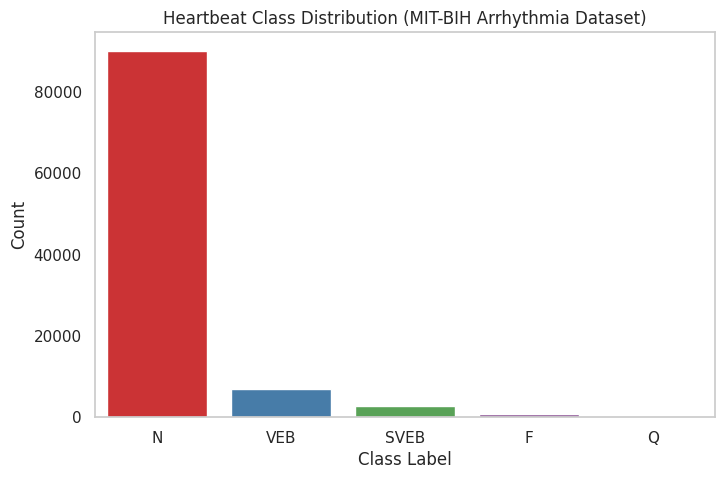

type
N       90083
VEB      7009
SVEB     2779
F         803
Q          15
Name: count, dtype: int64


In [3]:

class_counts = df_mitbih['type'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='Set1')
plt.title('Heartbeat Class Distribution (MIT-BIH Arrhythmia Dataset)', fontsize=12)
plt.xlabel('Class Label', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y')
plt.show()

# Print class-wise counts
print(class_counts)


# Check for missing values


In [4]:

missing_values = df_mitbih.isnull().sum()
missing = missing_values[missing_values > 0]

if missing.empty:
    print("No missing values found in the dataset.")
else:
    print("Columns with missing values:")
    print(missing)


No missing values found in the dataset.


# Statistical summary of numerical features

In [5]:


# Exclude non-numeric columns for summary
numeric_df = df_mitbih.drop(columns=['record', 'type'])
summary = numeric_df.describe().T
summary[['mean', 'std', 'min', 'max']]


,mean,std,min,max
0_pre-RR,279.400947,81.915453,11.000000,2114.000000
0_post-RR,278.588207,81.124963,6.000000,2114.000000
0_pPeak,0.049772,0.168789,-3.094391,3.821118
0_tPeak,0.372262,0.739879,-2.006422,4.118327
0_rPeak,1.054485,0.617508,-2.372835,4.018918
0_sPeak,-0.134376,1.027590,-3.622550,4.018918
0_qPeak,-0.090466,0.189436,-3.871359,3.080710
0_qrs_interval,28.326858,15.027789,0.000000,170.000000
0_pq_interval,10.972817,9.468930,1.000000,150.000000
0_qt_interval,59.776093,40.386054,5.000000,334.000000


# Feature correlation heatmap

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


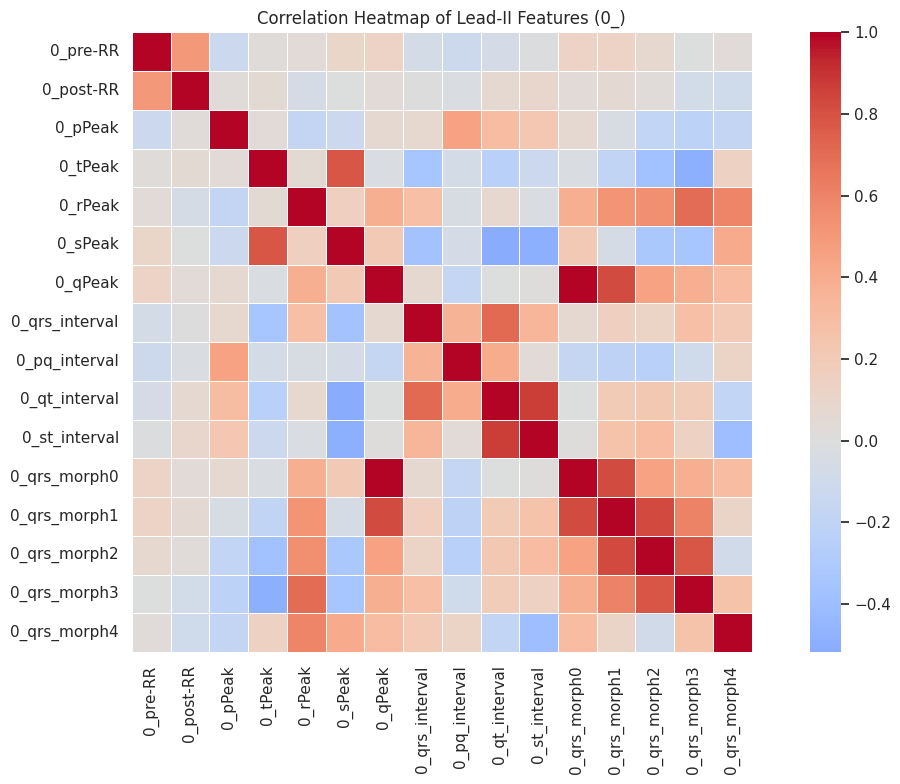

In [6]:


# Limit to a subset to avoid overcrowding (e.g., only Lead-II: columns starting with "0_")
lead_0_features = [col for col in df_mitbih.columns if col.startswith("0_")]

plt.figure(figsize=(12, 8))
corr_matrix = df_mitbih[lead_0_features].corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Lead-II Features (0_)")
plt.tight_layout()
plt.show()


# Distribution of rPeak (Lead-II) per class


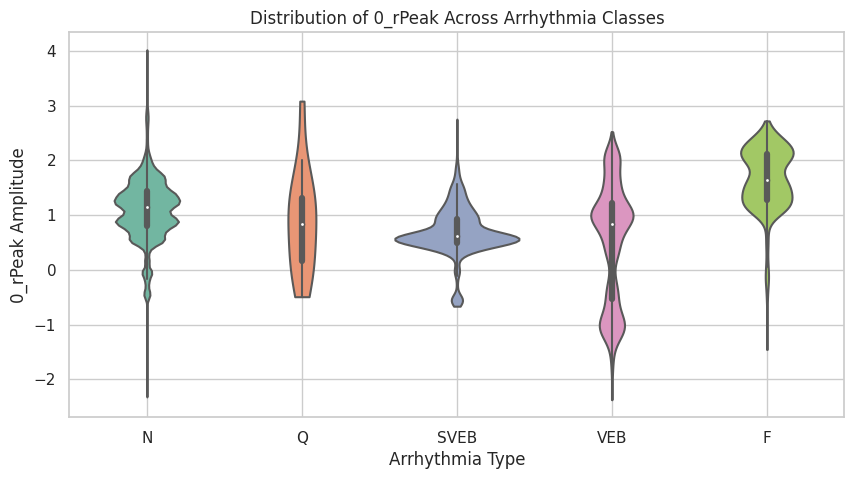

In [7]:

plt.figure(figsize=(10, 5))
sns.violinplot(data=df_mitbih, x='type', y='0_rPeak', palette='Set2', cut=0)
plt.title("Distribution of 0_rPeak Across Arrhythmia Classes")
plt.xlabel("Arrhythmia Type")
plt.ylabel("0_rPeak Amplitude")
plt.grid(True)
plt.show()


# Encode arrhythmia class labels for ML

In [8]:


from sklearn.preprocessing import LabelEncoder

df_encoded = df_mitbih.copy()
label_encoder = LabelEncoder()
df_encoded['label'] = label_encoder.fit_transform(df_encoded['type'])

# Check mapping
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Class to Label Mapping:")
print(label_mapping)

# Drop unused columns
X = df_encoded.drop(columns=['record', 'type', 'label'])
y = df_encoded['label']


Class to Label Mapping:
{'F': 0, 'N': 1, 'Q': 2, 'SVEB': 3, 'VEB': 4}


# Split into train and test sets

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")


Training samples: 80551
Testing samples: 20138


# Training a baseline Random Forest


Classification Report:
              precision    recall  f1-score   support

           F       0.95      0.78      0.86       160
           N       0.99      1.00      0.99     18017
           Q       0.00      0.00      0.00         3
        SVEB       0.99      0.81      0.89       556
         VEB       0.98      0.96      0.97      1402

    accuracy                           0.99     20138
   macro avg       0.78      0.71      0.74     20138
weighted avg       0.99      0.99      0.99     20138



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


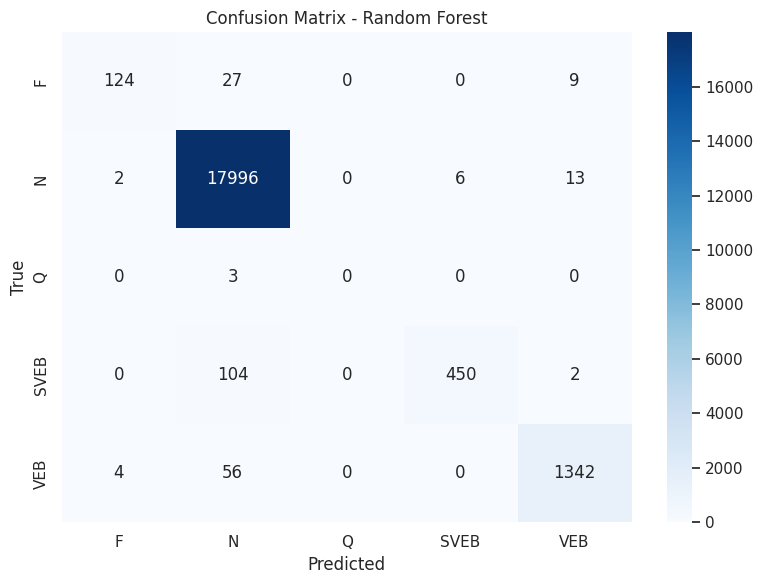

In [10]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

conf_mat = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


# Feature selection using feature importance from Random Forest

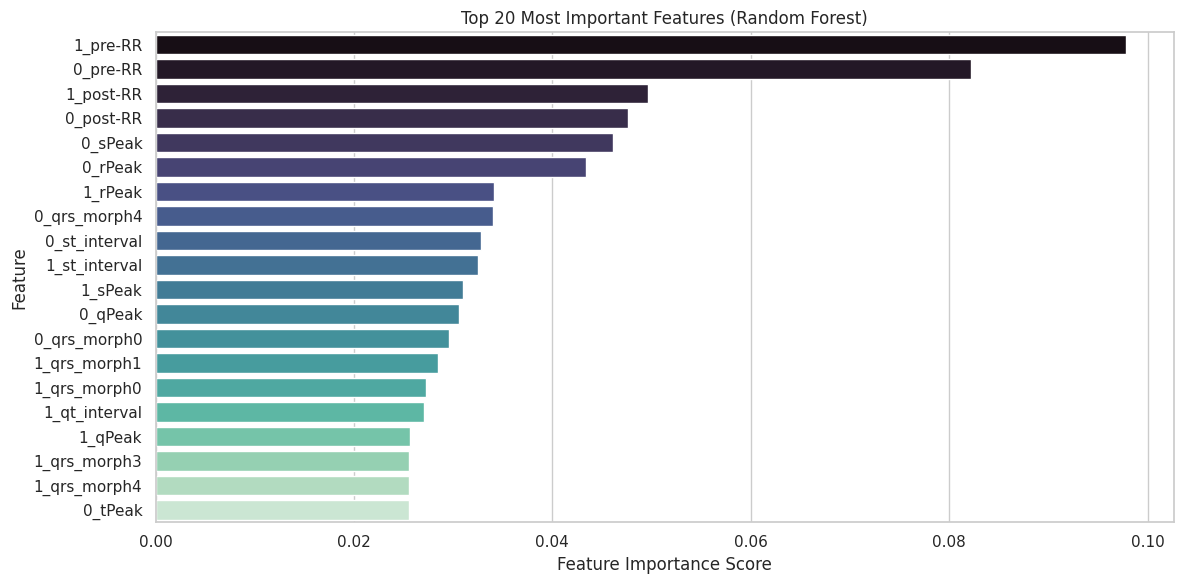

In [11]:


# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns
feature_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_df = feature_df.sort_values(by='importance', ascending=False)

# Visualize top 20 features
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_df.head(20), palette='mako')
plt.title("Top 20 Most Important Features (Random Forest)")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Select top N features (e.g., top 25)
top_n = 25
top_features = feature_df['feature'].iloc[:top_n].tolist()

X_selected = X[top_features]


# PCA visualization


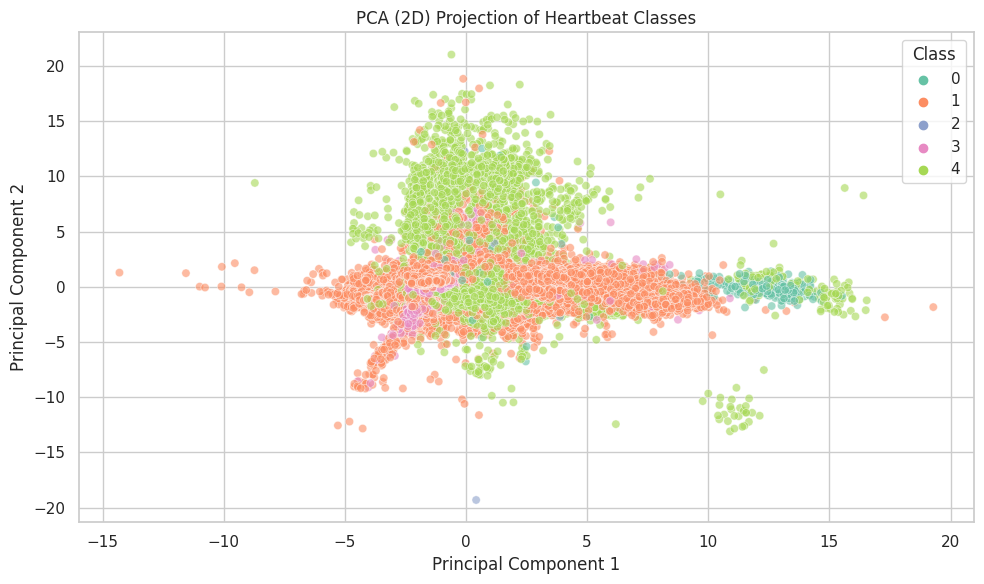

In [12]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# PCA to 2 components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set2', alpha=0.6)
plt.title("PCA (2D) Projection of Heartbeat Classes")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Class')
plt.grid(True)
plt.tight_layout()
plt.show()


# t-SNE(2D) visualization

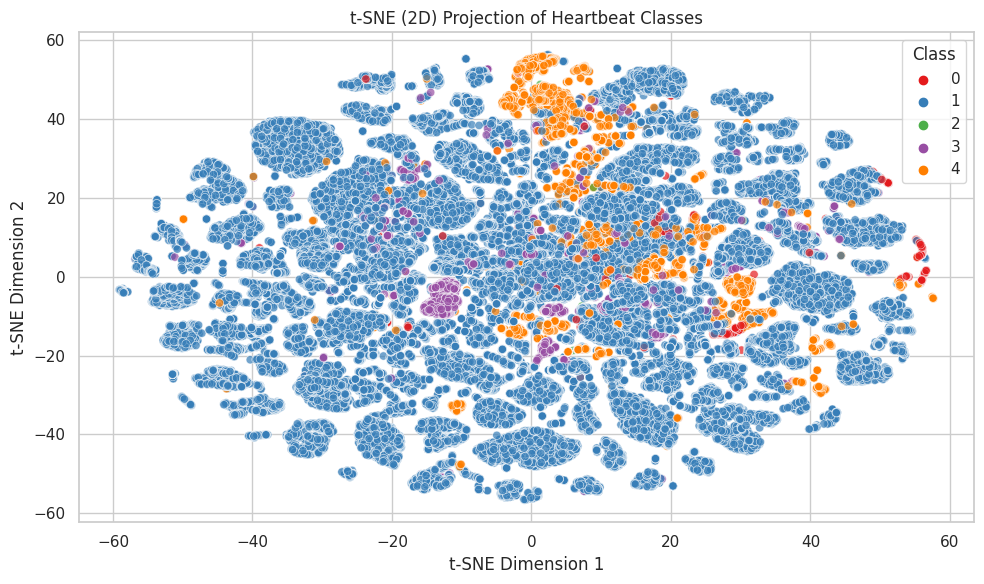

In [13]:


from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Plot t-SNE
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='Set1', alpha=0.7)
plt.title("t-SNE (2D) Projection of Heartbeat Classes")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title='Class')
plt.grid(True)
plt.tight_layout()
plt.show()


# XGBoost classifier

In [15]:

import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=6, scale_pos_weight=1, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_selected, y)

# Evaluate using cross-validation
from sklearn.model_selection import cross_val_score

xgb_scores = cross_val_score(xgb, X_selected, y, cv=5, scoring='accuracy')
print(f"Mean Cross-Validation Accuracy (XGBoost): {xgb_scores.mean():.4f}")


Mean Cross-Validation Accuracy (XGBoost): 0.9198


# Deep Learning (MLP) with Keras

In [16]:


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Prepare inputs
num_classes = len(np.unique(y))
y_dl = to_categorical(y)

X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(X_scaled, y_dl, test_size=0.2, stratify=y, random_state=42)

# Build model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train_dl, y_train_dl, epochs=20, batch_size=64, validation_split=0.2, verbose=1)

# Evaluate
loss, acc = model.evaluate(X_test_dl, y_test_dl)
print(f"Test Accuracy (Deep Learning): {acc:.4f}")


2025-06-16 06:20:42.630397: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750054842.941104      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750054843.029219      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/20


2025-06-16 06:20:59.418152: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


1007/1007 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9215 - loss: 0.3153 - val_accuracy: 0.9690 - val_loss: 0.1102
Epoch 2/20
1007/1007 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9649 - loss: 0.1240 - val_accuracy: 0.9755 - val_loss: 0.0877
Epoch 3/20
1007/1007 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9687 - loss: 0.1112 - val_accuracy: 0.9773 - val_loss: 0.0783
Epoch 4/20
1007/1007 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9726 - loss: 0.0932 - val_accuracy: 0.9780 - val_loss: 0.0741
Epoch 5/20
1007/1007 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9753 - loss: 0.0864 - val_accuracy: 0.9803 - val_loss: 0.0678
Epoch 6/20
1007/1007 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9757 - loss: 0.0832 - val_accuracy: 0.9812 - val_loss: 0.0627
Epoch 7/20
1007/1007 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9785 - loss: 0.0751 - val_accuracy: 0.9829 - val_loss: 0.0599
Epoch 8/20
1007/1007 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9776 - loss: 0.0775 - val_accurac

# XGBoost Predictions and Evaluation


XGBoost Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.78      0.85       160
           1       0.99      1.00      0.99     18017
           2       0.00      0.00      0.00         3
           3       0.96      0.84      0.90       556
           4       0.97      0.97      0.97      1402

    accuracy                           0.99     20138
   macro avg       0.77      0.72      0.74     20138
weighted avg       0.99      0.99      0.99     20138



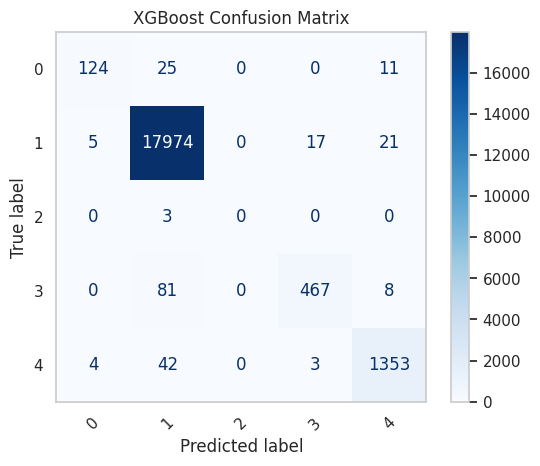

In [17]:

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, stratify=y, random_state=42)

# Fit XGBoost on training data
xgb_model = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=6, scale_pos_weight=1, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Predict
y_pred = xgb_model.predict(X_test)

# Classification report
print("XGBoost Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("XGBoost Confusion Matrix")
plt.grid(False)
plt.show()


# ROC Curve for Multiclass XGBoost

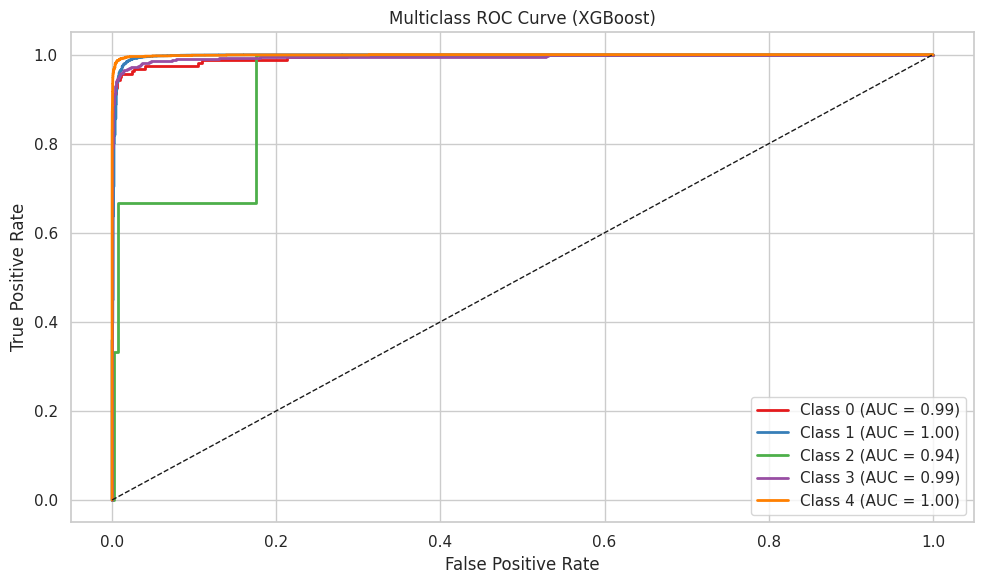

In [18]:


from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize output for ROC AUC
y_test_bin = label_binarize(y_test, classes=np.unique(y))
y_pred_prob = xgb_model.predict_proba(X_test)
n_classes = y_test_bin.shape[1]

# Compute ROC curve and AUC for each class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 6))
colors = sns.color_palette("Set1", n_colors=n_classes)
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'Class {np.unique(y)[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.title("Multiclass ROC Curve (XGBoost)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


# Evaluate MLP on Test Set


630/630 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MLP Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.72      0.84       160
           1       0.99      1.00      0.99     18017
           2       0.00      0.00      0.00         3
           3       0.95      0.80      0.87       556
           4       0.96      0.96      0.96      1402

    accuracy                           0.99     20138
   macro avg       0.78      0.70      0.73     20138
weighted avg       0.99      0.99      0.99     20138



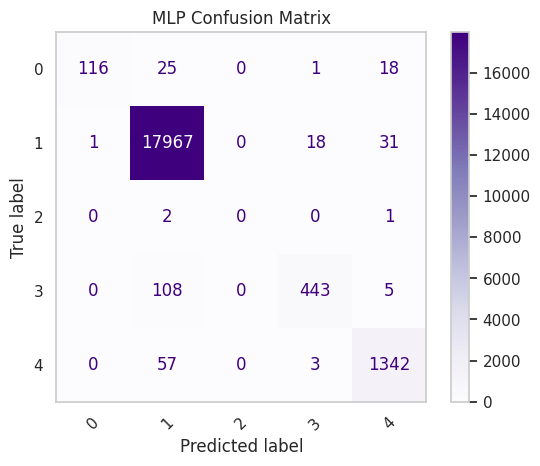

In [20]:

# Predict classes
y_pred_dl = model.predict(X_test_dl)
y_pred_classes = np.argmax(y_pred_dl, axis=1)
y_true_classes = np.argmax(y_test_dl, axis=1)

# Classification report
print("MLP Classification Report:\n")
print(classification_report(y_true_classes, y_pred_classes))

# Confusion matrix
cm_dl = confusion_matrix(y_true_classes, y_pred_classes)
disp_dl = ConfusionMatrixDisplay(confusion_matrix=cm_dl, display_labels=np.unique(y))
disp_dl.plot(cmap="Purples", xticks_rotation=45)
plt.title("MLP Confusion Matrix")
plt.grid(False)
plt.show()
